In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Daniel Villarruel & Franklin Limaico


# 🧪 Autonomous Activity: Dimensionality Reduction on Embryo Development Timelapse

In this hands-on activity, you will apply a variety of dimensionality reduction techniques to analyze real microscopy data. The dataset contains time-lapse images of normal and mutant embryos. Each image stack has approximately 450 frames.

---

**🎯 Objectives:**
- Explore, visualize, and preprocess multi-frame `.tif` images.
- Test and compare different data normalization strategies (e.g., [0,1] scaling vs StandardScaler).
- Use PCA, SVD, t-SNE, UMAP, and Autoencoders to extract and visualize developmental trajectories.
- Identify biological differences in developmental dynamics between embryo types.
- Reflect on the advantages, limitations, and behaviors of each technique.

📁 **Dataset:** [Google Drive Link](https://drive.google.com/drive/folders/1_qxqm-v5yCrme3pAW2rjyOOXIeQDuV54?usp=drive_link)

In [ ]:
import numpy as np
import pandas as pd
import tifffile as tf
import matplotlib.pyplot as plt

## 1. Load and Explore the Dataset

Each `.tif` file contains ~450 grayscale frames. Your first task is to:
- Load the 3 `.tif` files using `tifffile.imread`.
- Normalize each image stack using two strategies:
  - [0, 1] Min-Max normalization
  - Standardization using `StandardScaler`
- Plot a few representative frames across time for each embryo.

In [ ]:
data = '/content/drive/MyDrive/Yachay/MSc/2025-2/ml/week2/'

In [ ]:
control = tf.imread(data + 'Control.tif').astype(np.float32)
mutant1 = tf.imread(data + 'Mutant1.tif').astype(np.float32)
mutant2 = tf.imread(data + 'Mutant2.tif').astype(np.float32)

### Normalise each image

In [ ]:
def minmax_norm(img):
    norm = []
    for i in range(img.shape[0]):
        norm.append((img[i] - np.min(img[i])) / (np.max(img[i]) - np.min(img[i])))

    return np.array(norm)

In [ ]:
c_norm = minmax_norm(control)
m1_norm = minmax_norm(mutant1)
m2_norm = minmax_norm(mutant2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def scale(img):
    n, h, w = img.shape
    flat = img.ravel().reshape(-1, 1)

    scaler = StandardScaler()
    flat_scaled = scaler.fit_transform(flat)

    return flat_scaled.reshape(n, h, w)

In [ ]:
c_scaled = scale(control)
m1_scaled = scale(mutant1)
m2_scaled = scale(mutant2)

### Plot representative frames across time for each embryo

In [ ]:
times = [0, 50, 100, 150, 200, 250, 300, 350, 400, 449]

In [ ]:
x, y = np.meshgrid(np.arange(200), np.arange(200))

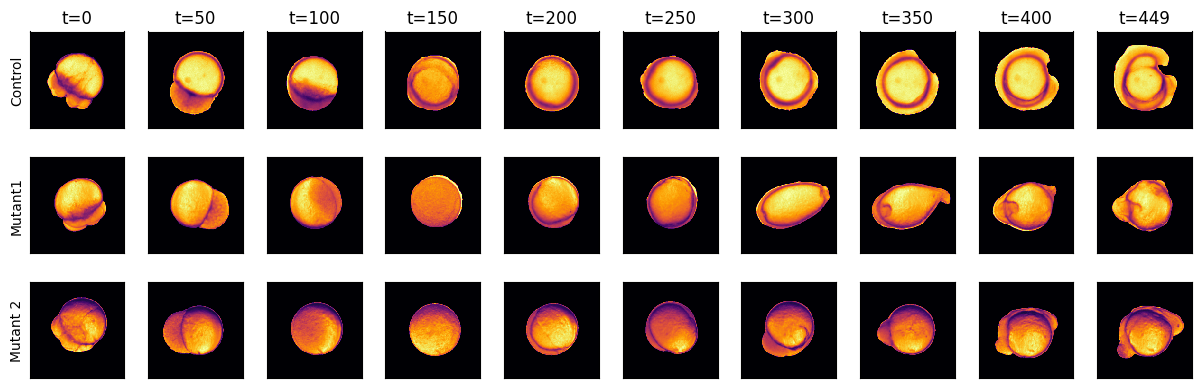

In [ ]:
fig, ax =  plt.subplots(3, 10, figsize=(15, 3*1.5))
for i, t in enumerate(times):
    ax[0, i].pcolormesh(x, y, c_norm[t], cmap='inferno', vmin=0, vmax=1)
    ax[0, i].set_title(f't={t}')
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    ax[0, 0].set_ylabel('Control')

for i, t in enumerate(times):
    ax[1, i].pcolormesh(x, y, m1_norm[t], cmap='inferno', vmin=0, vmax=1)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, 0].set_ylabel('Mutant1')

for i, t in enumerate(times):
    ax[2, i].pcolormesh(x, y, m2_norm[t], cmap='inferno', vmin=0, vmax=1)
    ax[2, i].set_xticks([])
    ax[2, i].set_yticks([])
    ax[2, 0].set_ylabel('Mutant 2')

fig.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()

## 2. Preprocess the Data

Flatten each frame and construct a matrix `X` with shape `(n_frames, n_pixels)` for each normalization method. Then create a label vector:

- `label = 0` → control embryo
- `label = 1` → mutant 1
- `label = 2` → mutant 2

This step will prepare the input data for dimensionality reduction.

In [ ]:
def flat(array):
  return array.reshape(array.shape[0], -1)

In [ ]:
c_mnmx_flat = flat(c_norm)
m1_mnmx_flat = flat(m1_norm)
m2_mnmx_flat = flat(m2_norm)

X_minmax = np.concatenate((c_mnmx_flat, m1_mnmx_flat, m2_mnmx_flat), axis=0)

In [ ]:
c_std_flat = flat(c_scaled)
m1_std_flat = flat(m1_scaled)
m2_std_flat = flat(m2_scaled)

X_standard = np.concatenate((c_std_flat, m1_std_flat, m2_std_flat), axis=0)

In [ ]:
lab1 = np.zeros(450)
lab2 = np.ones(450)
lab3 = np.ones(450) * 2

labels = np.concatenate((lab1, lab2, lab3))

> 🧪 **Experiment**: Try running all dimensionality reduction methods with both versions of the input (`X_minmax` and `X_standard`) and compare how they affect embeddings and separability.

## 3. PCA (Principal Component Analysis)

Apply PCA on both normalized datasets:
- Visualize the 2D PCA embedding colored by embryo type.
- Compare the separation between classes for `X_minmax` and `X_standard`.
- Plot the **explained variance ratio** and **cumulative variance** for each.

> 🧠 Tip: Use `PCA(n_components=2)` for plotting and `PCA(n_components=50)` to analyze cumulative variance.

### Visualize the 2D PCA embedding colored by embryo type.

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
colors = ['red', 'magenta', 'blue']
three = mcolors.ListedColormap(colors)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_minmax_pca = pca.fit_transform(X_minmax)

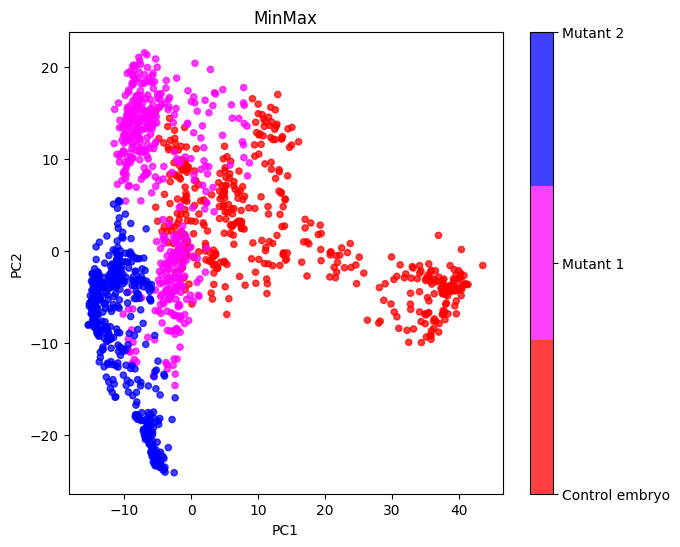

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter(X_minmax_pca[:, 0], X_minmax_pca[:, 1], c=labels, cmap=three, s=20, alpha=0.75)

plt.title("MinMax")
plt.xlabel("PC1")
plt.ylabel("PC2")

cbar = plt.colorbar(scatter, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_standard_pca = pca.fit_transform(X_standard)

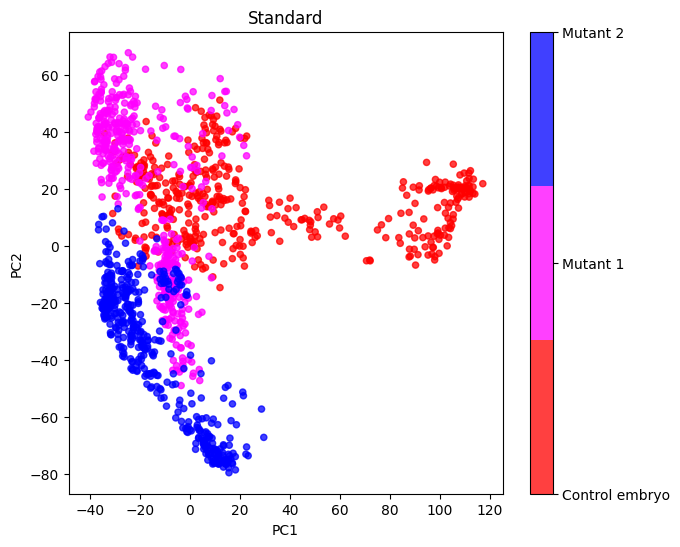

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter(X_standard_pca[:, 0], X_standard_pca[:, 1], c=labels, cmap=three, s=20, alpha=0.75)

plt.title("Standard")
plt.xlabel("PC1")
plt.ylabel("PC2")

cbar = plt.colorbar(scatter, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])

plt.show()

### Compare the separation between classes for X_minmax and X_standard.

- In both plots, the fundamental positions of the three clases are nearly identical. The control embryo (red) and mutant 2 (blue) clusters are the most distinct from each other.

- Both scaling methods reveal that mutant 1 (magenta) acts as an intermediate groupo.

- The main difference observed is the scale of the axes. Here $X_{\rm std}$ shows a much wider range of values for PC1 and PC2.

### Plot the explained variance ratio and cumulative variance for each.

In [ ]:
pca1 = PCA(n_components=50)
X_minmax_pca = pca1.fit_transform(X_minmax)
explained_var_ratio1 = pca1.explained_variance_ratio_

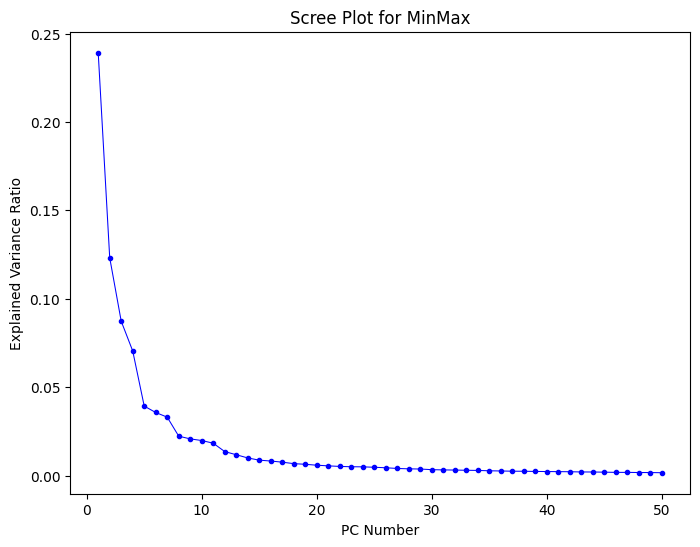

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio1) + 1), explained_var_ratio1, 'bo-', lw=0.75, ms=3)
plt.title('Scree Plot for MinMax')
plt.xlabel('PC Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
cumulative_explained_var1 = np.cumsum(explained_var_ratio1)

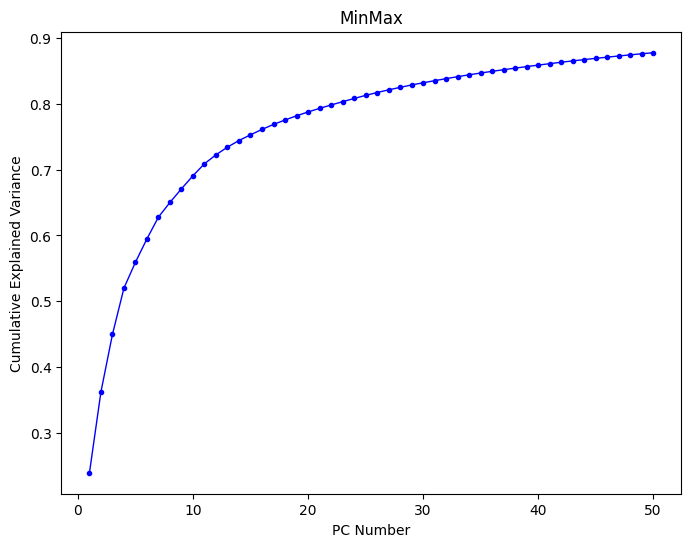

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio1) + 1), cumulative_explained_var1, 'bo-', lw=1, ms=3)
plt.title('MinMax')
plt.xlabel('PC Number')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca2 = PCA(n_components=50)
X_standard_pca = pca2.fit_transform(X_standard)
explained_var_ratio2 = pca2.explained_variance_ratio_

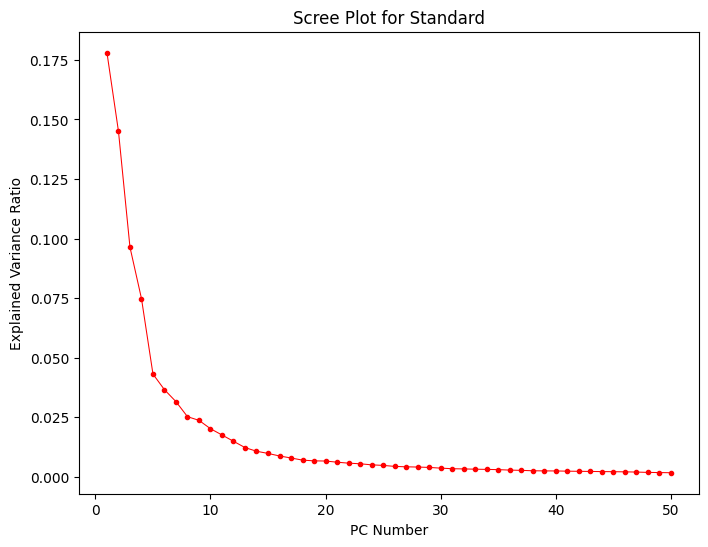

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio2) + 1), explained_var_ratio2, 'ro-', lw=0.75, ms=3)
plt.title('Scree Plot for Standard')
plt.xlabel('PC Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
cumulative_explained_var2 = np.cumsum(explained_var_ratio2)

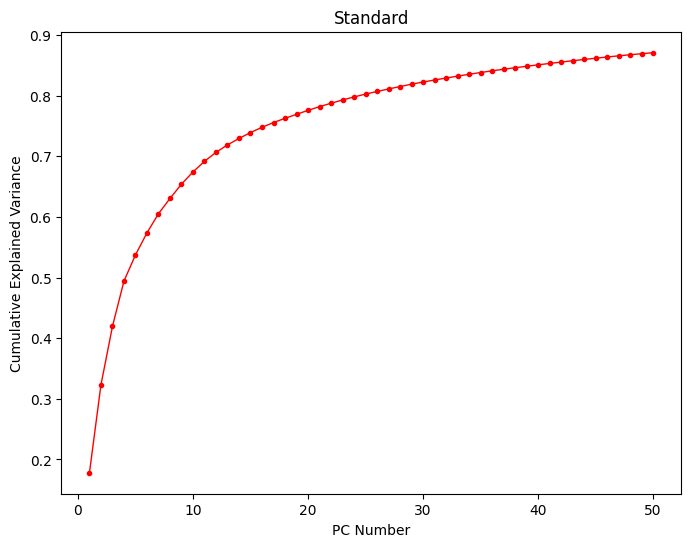

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio2) + 1), cumulative_explained_var2, 'ro-', lw=1, ms=3)
plt.title('Standard')
plt.xlabel('PC Number')
plt.ylabel('Cumulative Explained Variance')
plt.show()

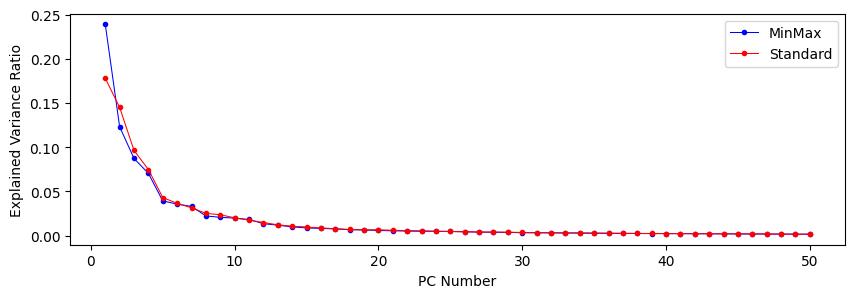

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, len(explained_var_ratio1) + 1), explained_var_ratio1, 'bo-', lw=0.75, ms=3, label='MinMax')
plt.plot(range(1, len(explained_var_ratio2) + 1), explained_var_ratio2, 'ro-', lw=0.75, ms=3, label='Standard')
plt.xlabel('PC Number')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='upper right')
plt.show()

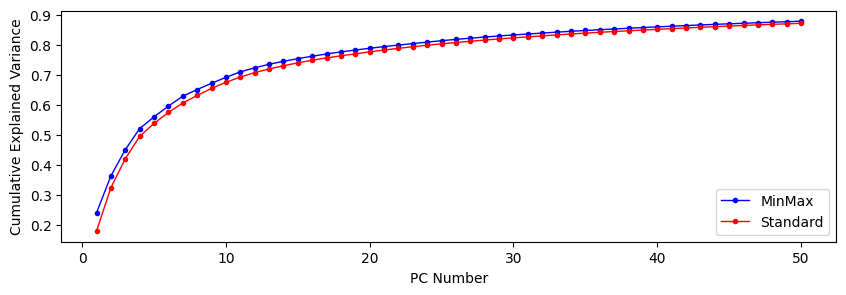

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, len(explained_var_ratio1) + 1), cumulative_explained_var1, 'bo-', lw=1, ms=3, label='MinMax')
plt.plot(range(1, len(explained_var_ratio2) + 1), cumulative_explained_var2, 'ro-', lw=1, ms=3, label='Standard')
plt.xlabel('PC Number')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='lower right')
plt.show()

## 4. SVD (Singular Value Decomposition)

Apply SVD to both datasets and analyze:
- The decay of singular values on a log scale.
- The cumulative energy of singular values.
- Compare how quickly each normalization captures energy.

> 🔍 Insight: SVD reveals the inherent structure of your dataset. A sharper drop often suggests stronger linear compressibility.

In [ ]:
U1, S1, Vt1 = np.linalg.svd(X_minmax, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X_standard, full_matrices=False)

### Decay of singular values on a log scale

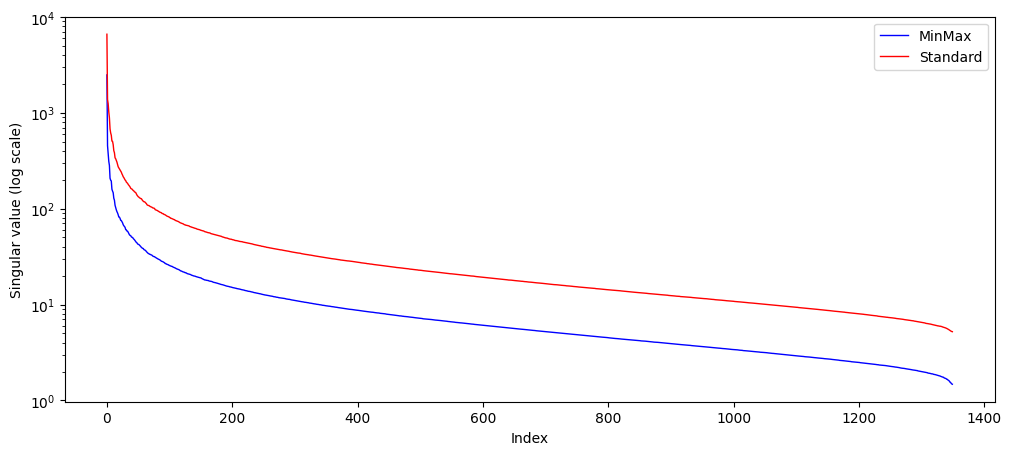

In [ ]:
plt.figure(figsize=(12, 5))

plt.semilogy(S1, 'b', lw=1, label='MinMax')
plt.semilogy(S2, 'r', lw=1, label='Standard')

plt.xlabel('Index')
plt.ylabel('Singular value (log scale)')
plt.legend()
plt.show()

### Cumulative energy of singular values

In [ ]:
total_energy1 = np.sum(S1**2)
total_energy2 = np.sum(S2**2)

cumulative_energy1 = np.cumsum(S1**2) / total_energy1
cumulative_energy2 = np.cumsum(S2**2) / total_energy2

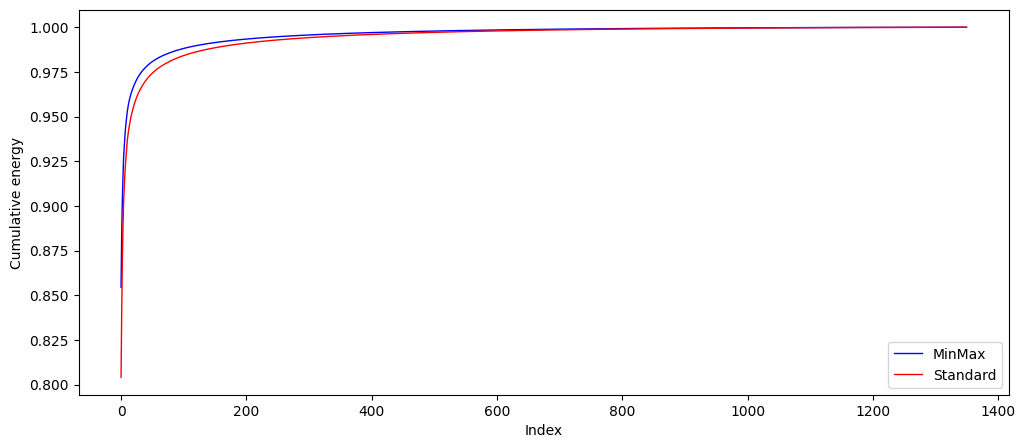

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(cumulative_energy1, 'b', lw=1, label='MinMax')
plt.plot(cumulative_energy2, 'r', lw=1, label='Standard')

plt.xlabel('Index')
plt.ylabel('Cumulative energy')
plt.legend()
plt.show()

### How quickly each normalisation captures energy

In [ ]:
for i, value in enumerate(cumulative_energy1):
    if value >= 0.95:
        print(f'Minimum k: {i + 1}')
        break

Minimum k: 11


In [ ]:
for i, value in enumerate(cumulative_energy2):
    if value >= 0.95:
        print(f'Minimum k: {i + 1}')
        break

Minimum k: 17


MinMax normalisation captures energy slightly than Standard.

- **Decay of single values**:
The singular values for Standard (red) are larger in magnitude thatn those for MinMax (blue). This is expected because the methods for Standard center data at cero with variance 1, which results in a larger spread of values compared to MinMax.

- **Cumulative energy**:
MinMax leads to a slightly more compact representation of energy.

## 5. t-SNE

Use t-SNE to capture local structure and dynamics:
- Run t-SNE with different perplexities `[5, 30, 100]`.
- Plot the 2D embeddings and analyze how clusters behave.
- Compare results between both normalized inputs.

> ⏳ Note: t-SNE is computationally intensive and sensitive to hyperparameters.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
perplexities = [5, 30, 100]

In [ ]:
tsne_minmax = []
tsne_standard = []

for i in perplexities:
    t_minmax = TSNE(n_components=2, perplexity=i, random_state=42)
    tsne_minmax.append(t_minmax.fit_transform(X_minmax))
    t_standard = TSNE(n_components=2, perplexity=i, random_state=42)
    tsne_standard.append(t_standard.fit_transform(X_standard))

tsne_minmax = np.array(tsne_minmax)
tsne_standard = np.array(tsne_standard)

### Plot the 2D embeddings and analyze how clusters behave.

/tmp/ipython-input-2761309572.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 700x600 with 2 Axes> than <Figure size 1500x325 with 4 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)


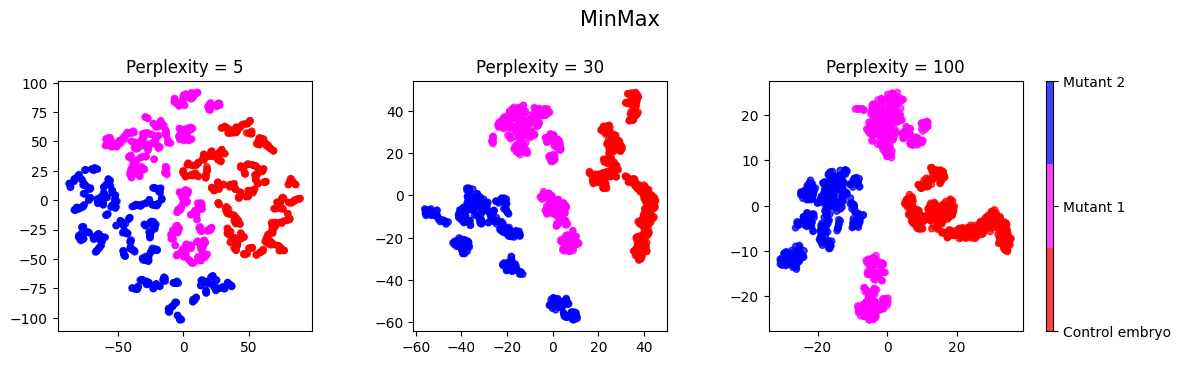

In [ ]:
# MinMax
fig, axs = plt.subplots(1, 3, figsize=(15, 3.25))
for i in range(3):
    cmap = axs[i].scatter(tsne_minmax[i][:, 0], tsne_minmax[i][:, 1], c=labels, cmap=three, s=20, alpha=0.75)
    axs[i].set_title(f'Perplexity = {perplexities[i]}')

fig.subplots_adjust(wspace=0.4)
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])
plt.suptitle("MinMax", size=15, y=1.1)

plt.show()

/tmp/ipython-input-347866183.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 700x600 with 2 Axes> than <Figure size 1500x325 with 4 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)


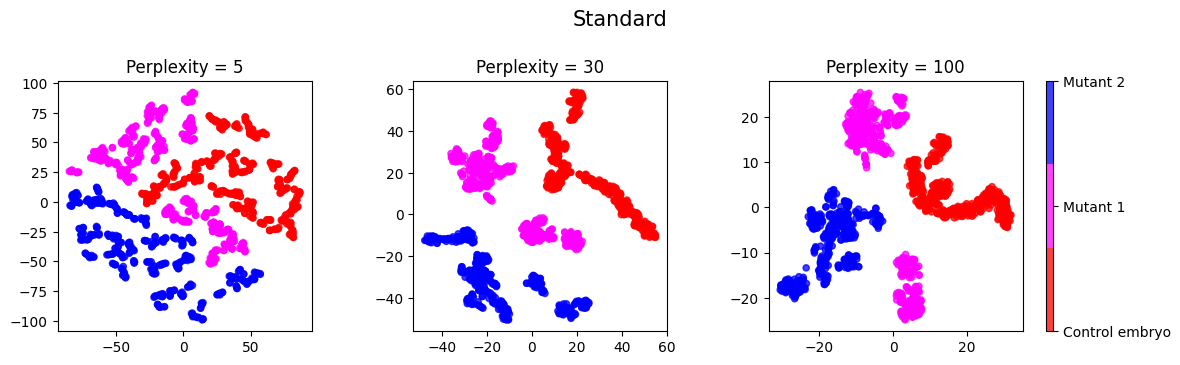

In [ ]:
# Standard
fig, axs = plt.subplots(1, 3, figsize=(15, 3.25))
for i in range(3):
    cmap = axs[i].scatter(tsne_standard[i][:, 0], tsne_standard[i][:, 1], c=labels, cmap=three, s=20, alpha=0.75)
    axs[i].set_title(f'Perplexity = {perplexities[i]}')

fig.subplots_adjust(wspace=0.4)

cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])
plt.suptitle("Standard", size=15, y=1.1)

plt.show()

### Compare results between both normalized inputs.

Both scaling methods produce nearly identical t-SNE embeddings at each perplexity level, with higher perplexities yielding better-defined and more separated clusters.

Choosing MinMax or Standard does not have a high impact on the final t-SNE embeddings. The most critical factor is selecting an appropriate perplexity value.

## 6. UMAP

Use UMAP for global structure visualization:
- Try combinations of `n_neighbors` and `min_dist`.
- Compare embeddings across normalization methods.
- Observe both local clustering and trajectory smoothness.

> 📌 UMAP is faster and often preserves better continuity in developmental trajectories.

### Try combinations of `n_neighbors` and `min_dist`.

In [ ]:
import umap.umap_ as umap

In [ ]:
neighbours = [5, 50]
min_dist = [0.1, 0.5]

In [ ]:
X_minmax_umap = []
X_standard_umap = []

for i in neighbours:
    for j in min_dist:
        umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=i, min_dist=j)
        X_minmax_umap.append(umap_model.fit_transform(X_minmax))
        X_standard_umap.append(umap_model.fit_transform(X_standard))

X_minmax_umap = np.array(X_minmax_umap)
X_standard_umap = np.array(X_standard_umap)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: 

### Compare embeddings across normalisation methods.

In [ ]:
labels_neighbors = [5, 5, 50, 50]
labels_distances = [0.1, 0.5, 0.1, 0.5]

/tmp/ipython-input-1111929781.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 700x600 with 2 Axes> than <Figure size 1800x300 with 5 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)


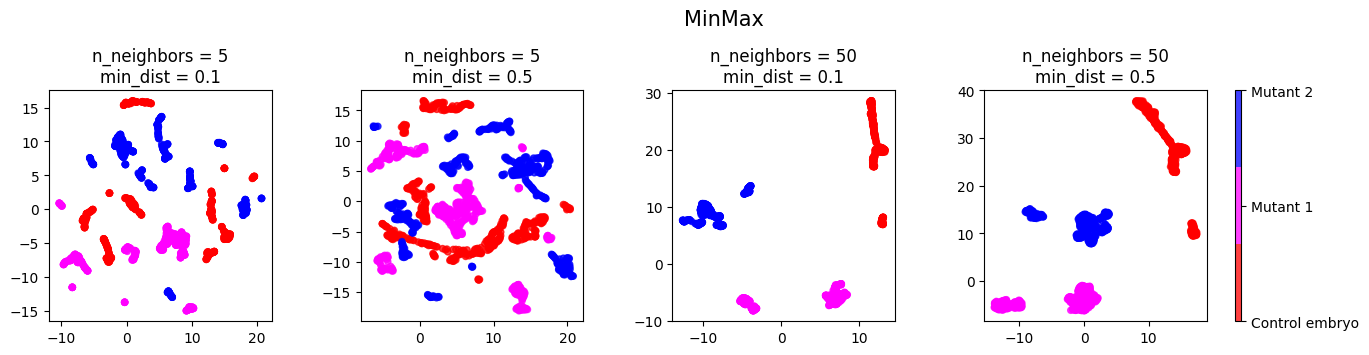

In [ ]:
# MinMax
fig, axs = plt.subplots(1, 4, figsize=(18, 3))
for i in range(4):
    cmap = axs[i].scatter(X_minmax_umap[i][:, 0], X_minmax_umap[i][:, 1], c=labels, cmap=three, s=20, alpha=0.75)
    axs[i].set_title(f'n_neighbors = {labels_neighbors[i]}\n' + f'min_dist = {labels_distances[i]}')

fig.subplots_adjust(wspace=0.4)

cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])
plt.suptitle("MinMax", size=15, y=1.15)

plt.show()

/tmp/ipython-input-444592095.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 700x600 with 2 Axes> than <Figure size 1800x300 with 5 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)


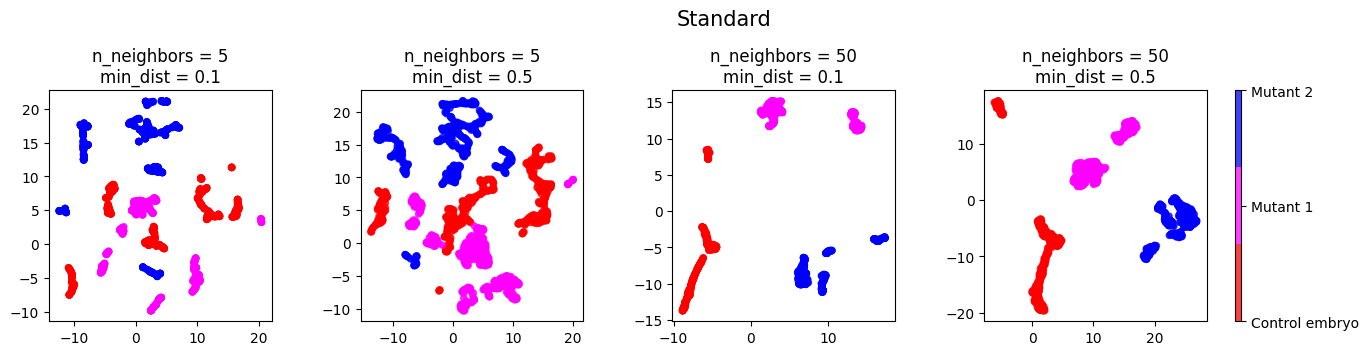

In [ ]:
# Standard
fig, axs = plt.subplots(1, 4, figsize=(18, 3))
for i in range(4):
    cmap = axs[i].scatter(X_standard_umap[i][:, 0], X_standard_umap[i][:, 1], c=labels, cmap=three, s=20, alpha=0.75)
    axs[i].set_title(f'n_neighbors = {labels_neighbors[i]}\n' + f'min_dist = {labels_distances[i]}')

fig.subplots_adjust(wspace=0.4)

cbar = plt.colorbar(scatter, ticks=[0, 1, 2], ax=axs.ravel().tolist(), aspect=35, pad=0.02)
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])
plt.suptitle("Standard", size=15, y=1.15)

plt.show()

The combination of `n_neighbors=50` and `min_dist=0.1` provides the clearest separation. Results with MinMax and Standard are almost identical.

None of the parameter combinations reveal a clear, smooth and trajectory or continuous path between the three classes.

## 7. Autoencoder

Train a neural autoencoder to learn a 2D latent space:
- Architecture: `input → 128 → 32 → 2 → 32 → 128 → output`
- Use ReLU activations and MSE loss.
- Plot the latent 2D representations colored by embryo.

> 💡 Autoencoders are flexible nonlinear methods that may capture dynamics not seen by linear projections.

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
input_dim = X_minmax.shape[1]

In [ ]:
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

In [ ]:
decoder = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

In [ ]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

### MinMax

In [ ]:
autoencoder.fit(X_minmax, X_minmax, epochs=20, batch_size=50, verbose=0)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


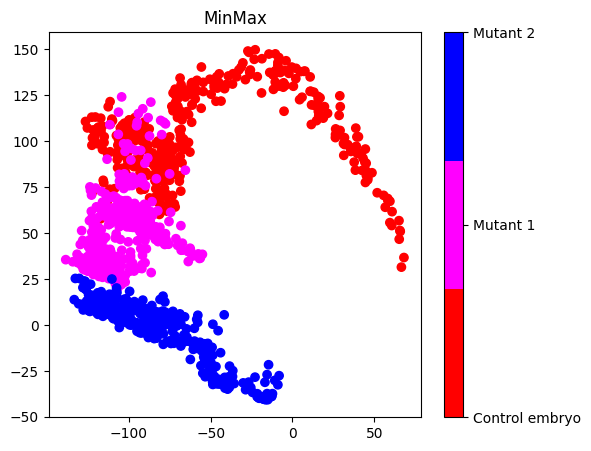

In [ ]:
X_minmax_pred = encoder.predict(X_minmax)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_minmax_pred[:, 0], X_minmax_pred[:, 1], c=labels, cmap=three)
plt.title("MinMax")

cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])

plt.show()

### Standard

In [ ]:
autoencoder.fit(X_standard, X_standard, epochs=20, batch_size=50, verbose=0)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


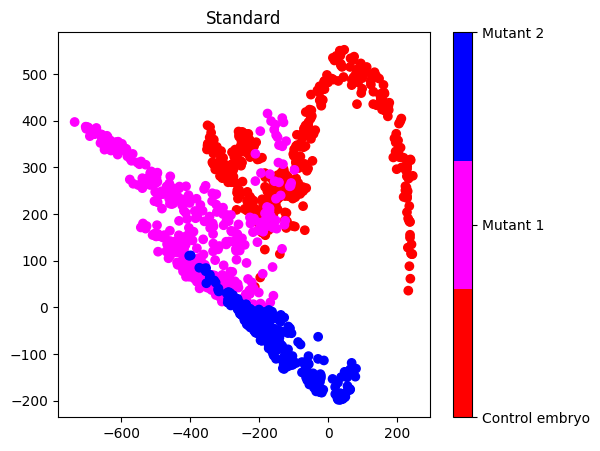

In [ ]:
X_standard_pred = encoder.predict(X_standard)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_standard_pred[:, 0], X_standard_pred[:, 1], c=labels, cmap=three)
plt.title("Standard")

cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Control embryo', 'Mutant 1', 'Mutant 2'])

plt.show()

## 8. Final Reflection

Write a short report answering the following:

1. What differences in developmental dynamics did you observe?
2. Which method best captured biologically relevant features?
3. Which normalization (Min-Max or StandardScaler) led to better embeddings?
4. At which point do mutant trajectories diverge from normal?
5. How consistent were the results across methods (PCA, t-SNE, UMAP, Autoencoders)?

> 📝 Submit this as a 1-page summary or short presentation.

### 1.

The control embryo follows a distinct developmental trajectory. Both mutant embryos diverge from this path.

Mutant 1 is consistently positioned in the feature space between the control and mutant 2.

The control embryo undergoes complex folding, while mutant 1 stalls and elongates, and mutant 2 also stalls but appears to have a different development path.

### 2.

- For classification

UMAP with MinMax normalisation and high perplexity (which benefits more global structure). We notice that the differences are mainly morphological.

- For developmental process

The autoencoder captures a continuous trajectory-like path of development.

## 3.

For this dataset, neither MinMax nor Standard are largely better.

Plots across different methods are qualitatively identical, with similar geometric structures and class relationships.

## 4.

The analyses do not point to an exact time frame, but there is strong support for divergence occurring in the later stages of development. Visually, differences start to be significative after $t=250$.



In [ ]:
c_comp = np.mean(c_norm, axis=(1, 2))
m1_comp = np.mean(m1_norm, axis=(1, 2))
m2_comp = np.mean(m2_norm, axis=(1, 2))

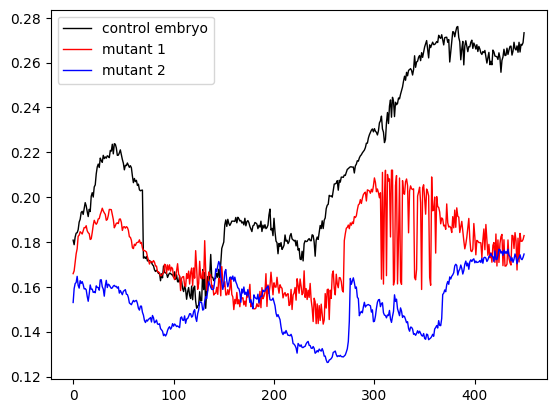

In [ ]:
plt.figure()
plt.plot(np.arange(450), c_comp, 'k', lw=1, label='control embryo')
plt.plot(np.arange(450), m1_comp, 'r', lw=1, label='mutant 1')
plt.plot(np.arange(450), m2_comp, 'b', lw=1, label='mutant 2')
plt.legend(loc='upper left')
plt.show()

## 5.



The results are highly consistent in their core findings.

Al four methods separated the three types and identified mutant 1 as the intermediate state between the control embryo and mutant 2.